In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Dropout, MaxPooling2D, Conv2D
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# **Getting Data from the Files**

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train , y_train) , (x_test, y_test) = cifar10.load_data()
print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Shape of x_train : (50000, 32, 32, 3)
Shape of y_train : (50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


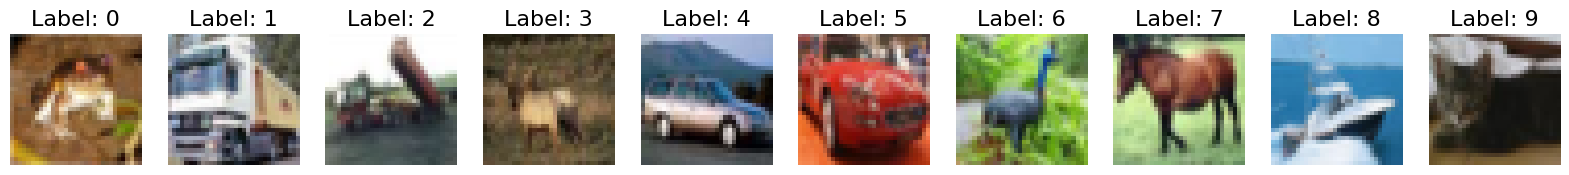

In [ ]:
num_classes = 10
f, ax= plt.subplots(1, 10, figsize=(20, 20))
y_train_labels = np.argmax(y_train, axis=1)
for i in range(10):
  ax[i].imshow(x_train[i])
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  ax[i].axis('off')
print(np.unique(y_train_labels))
print(np.bincount(y_train_labels))
plt.show()

In [ ]:
# # This one visualizes rotation of image . Why? because i wanted to find out should the
# # model have aggressive data augmentation for rotation.
# sample = x_train[0]


# fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# axes[0].imshow(sample)
# axes[0].set_title('Original')


# from scipy import ndimage
# axes[1].imshow(ndimage.rotate(sample, 18, reshape=False))=
# axes[1].set_title('18° (0.05)')

# axes[2].imshow(ndimage.rotate(sample, 36, reshape=False))
# axes[2].set_title('36° (0.1)')

# axes[3].imshow(ndimage.rotate(sample, 72, reshape=False))
# axes[3].set_title('72° (0.2) - ah hell nah')

# plt.show()

## **Preparing of Data. Augmentation and setting up the model.**


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1)
])

rescale = tf.keras.Sequential([
    layers.Rescaling(1./255)
])

In [ ]:
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    data_augmentation,
    Conv2D(32, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

modelCNN.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
modelCNN.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,438,986 (5.49 MB)

 Trainable params: 1,438,346 (5.49 MB)

 Non-trainable params: 640 (2.50 KB)

## **Training time**

In [ ]:
batch_size = 64
epochs = 50

historyCNN = modelCNN.fit(x=x_train, y=y_train , batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.2735 - loss: 2.1984 - val_accuracy: 0.4927 - val_loss: 1.3690
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.5099 - loss: 1.3305 - val_accuracy: 0.5306 - val_loss: 1.3494
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5867 - loss: 1.1324 - val_accuracy: 0.6193 - val_loss: 1.0563
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6346 - loss: 1.0167 - val_accuracy: 0.6578 - val_loss: 1.0164
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6681 - loss: 0.9328 - val_accuracy: 0.6604 - val_loss: 1.0070
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6996 - loss: 0.8551 - val_accuracy: 0.6934 - val_loss: 0.9582
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7195 - loss: 0.7996 - val_accuracy: 0.6742 - val_loss: 0.9843
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7336 - loss: 0.7601 - 

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))
# Just to check if my run time type is on the actual GPU i set.

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### **Evaluation of Training Accuracy and Validation Accuracy**


Train Accuracy [0.8803799748420715]
Valid Accuracy [0.8270999789237976]
Train Loss [0.3435894548892975]
Valid Loss [0.6401574015617371]
Accuracy Gap: 5.33 percentage points


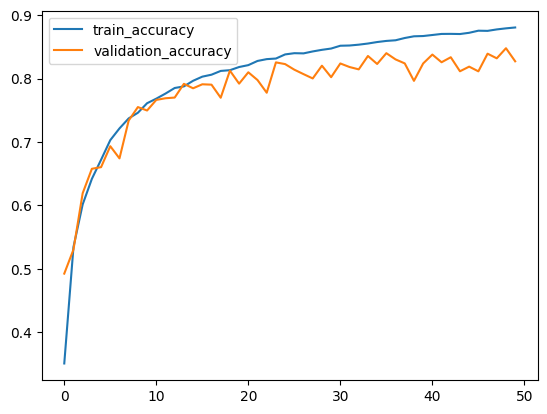

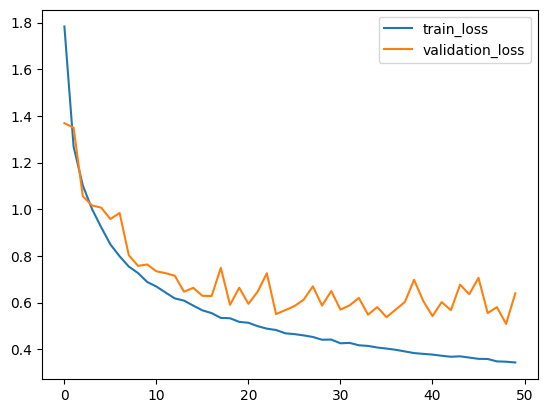

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8312 - loss: 0.6257
Test Loss: 0.640157163143158, Test Accuracy: 0.8270999789237976


In [ ]:
print(f"Train Accuracy {historyCNN.history['accuracy'][-1:]}")
print(f"Valid Accuracy {historyCNN.history['val_accuracy'][-1:]}")
print(f"Train Loss {historyCNN.history['loss'][-1:]}")
print(f"Valid Loss {historyCNN.history['val_loss'][-1:]}")
train_acc = historyCNN.history['accuracy'][-1]
val_acc = historyCNN.history['val_accuracy'][-1]

gap = train_acc - val_acc
gap_percent = 100 * gap

print(f"Accuracy Gap: {gap_percent:.2f} percentage points")
plt.plot(historyCNN.history['accuracy'], label='train_accuracy')
plt.plot(historyCNN.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()
plt.plot(historyCNN.history['loss'], label='train_loss')
plt.plot(historyCNN.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
test_loss, test_acc = modelCNN.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))


In [ ]:
y_pred = modelCNN.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[5.27321908e-10 1.48770823e-07 4.70078465e-09 ... 8.80115113e-06
  5.45038063e-07 7.28170024e-10]
 [1.67381246e-12 2.28426167e-10 1.46454964e-19 ... 2.05082065e-20
  1.00000000e+00 1.02778385e-11]
 [9.46280720e-10 3.60457051e-07 7.06109130e-12 ... 9.41664146e-14
  9.99996781e-01 2.83049212e-06]
 ...
 [1.06782295e-06 8.44613623e-07 4.29497100e-04 ... 1.11576391e-03
  1.17025975e-05 4.94036112e-06]
 [2.19119341e-12 1.00000000e+00 1.27625376e-11 ... 2.74288925e-12
  2.18079183e-11 9.16263954e-10]
 [4.96339149e-14 9.51414240e-14 4.91316989e-14 ... 9.99999881e-01
  3.84840076e-12 6.88570498e-14]]
[3 8 8 ... 5 1 7]


Correct Prediction!


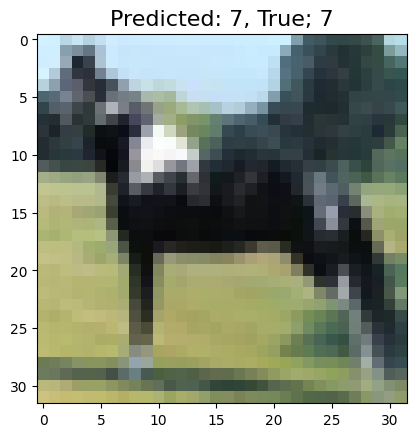

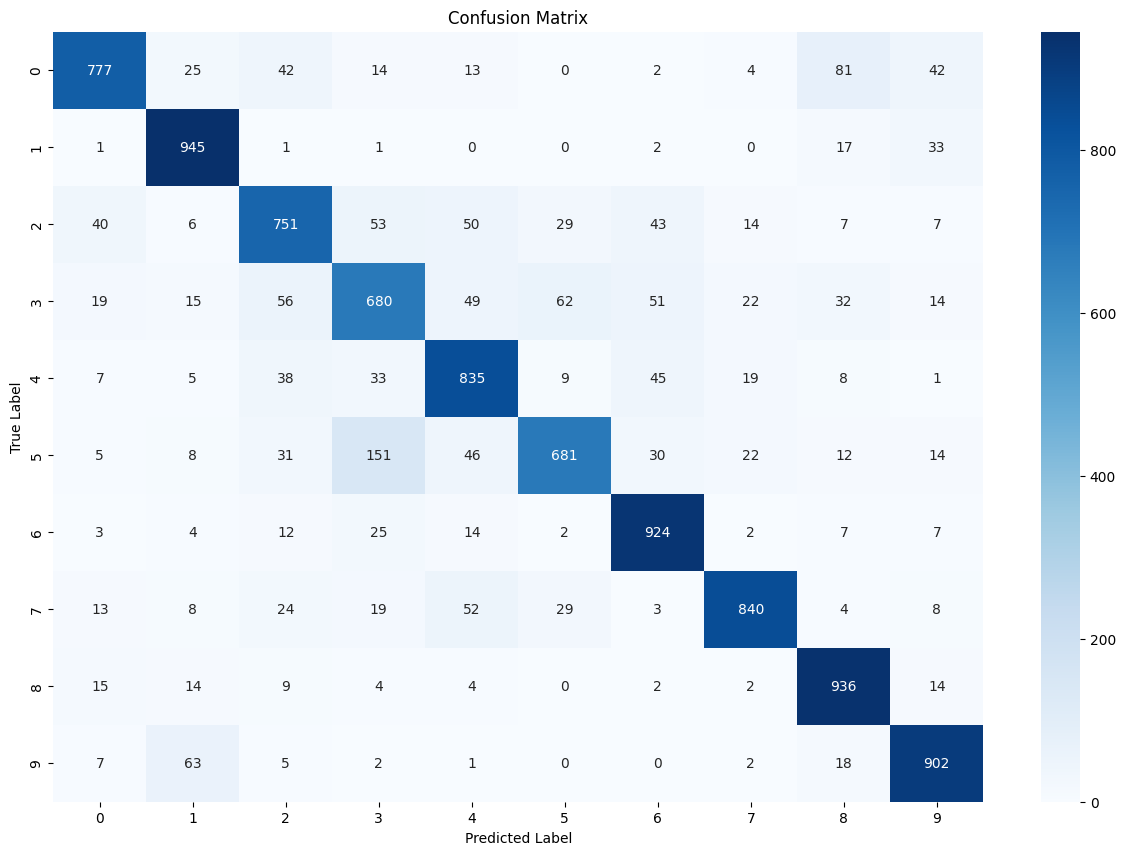

In [ ]:
# single example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True; {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample)
if y_sample_pred_class != y_sample_true:
  print("Incorrect Prediction!")
else:
  print("Correct Prediction! hooray")
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');
